# ITCS 4156 - Programming Assignment 1-  Linear Regression


<font color="blue"> NAME: type your name here </font>

# Instructions

In this programming assignment you will be training **four** kinds of models to predict the house prices for Boston homes. The four models you'll be using are:

1. Linear regression with **one variable** using **ordinary least squared** method.
2. Linear regression with **multiple variables** using **least mean squares** method.
3. Polynomial regression with **one variable** using **ordinary least squares**.
4. Polynomial regression with **multiple variables** and **regularization using ordinary least squares** method.

This mini-projects will work similarly to the labs where the are TODOs you must complete. Be on the lookout for **TODO** tags - they guide you towards what needs to be done. However, unlike the labs, most of the coding will now be left to you and there will be less direct instructions. The goal of this mini-project is for you to practice what your learned in the labs on your own! There are two types of TODOs:

1. **TODO**: This is a TODO that will be manually graded by the TA.
2. **AutoLab TODO**: This is a TODO that will be automatically graded using Autolab.

You will need to do the following throughout this mini project:
1. You will load the housing dataset using our code. 

2. You will complete the guided explanation of the dataset. This exploration and visualization should be accompanied by explanations. The goal is to gain a understanding of your data and what preprocessing steps will be needed. 
    1. Explanations should not only explain what you are observing in your visualizations and results but should also explain why you are seeing something and the potential implications of what you are seeing.
    
3. Next, you will implement each of the four modules. You will write you code in the scripts found in the `itcs4156/assigments/regression` directory. You will do all your training and validation of the modules from the notebook. Further you will provide visualization of your results with breif descriptions of what you are observing.

4. Lastly, you will run the evaluation code. This is a local test you can use to assess how well your algorithm might perform before submitting to Autolab (it essentially performs data validation for each model for you again). This will require you fill in the `Hyperparameter` class in the `itcs4156/assigments/regression/train.py` script for setting hyperparameters. Once you have set the hyperparameters you can run the evaluation script as these hyperparameters will be used to train a model that will be assesd both locally and on Autolab. Your goal here is to fine-tune your models, if needed, so that you have a good selection of hyperparameters to use when your model is re-trained on Autolab!

5. If you are passing all the test checks you can submit your code to Autolab. To do so zip the `regression/` directory inside `itcs4156/assigments/` directory and then submit it to Autolab. Once submited, you must wait for Autolab to grade your code. Your code might perform worse or as good as the local evaluations! Refer to the `README.md` at the root of the repository or the `gitlab-intructions.pdf` on Canvas to review the instructions for submitting your code. Finally, you'll need to submit this notebook to Canvas as well. 

<hr>

# Grading 

The final grading will be done on **TEST** dataset that you have not seen before when you submit this assignment on **Autolab**. 80 points will come from whether or not you pass the MSE checks on Autolab (meaning you receive below a given MSE score for each task). The other 20 points will come from the multiple in notebook TODOs which center around  analyising results and data visualization/exploration.

**YOU WILL ONLY GET <u>7</u> submissions to Autolab for this lab. <u>Only your final submission will be graded</u>**. Further, when you submit to auotlab you will only have **180 seconds for <u>ALL</u> your algorithms to be trained and tested**.

Points | TODO Type | Description
--|----|----:
20 | In notebook TODOs | Visualize and anlyze results 
20 | Autolab TODO 1 | OrdinaryLeastSquares with $MSE < 60$
20 | Autolab TODO 2 | LeastMeanSqaures with $MSE < 90$
20 | Autolab TODO 3 | PolynomialRegression with $MSE < 30$
20 | Autolab TODO 4 | PolynomialRegressionREgularized with $MSE < 30$

The rank will be computed based on your average **test MSE** for all 4 models/tasks. Your ranking will be visible to you (and anonymous to others) in leaderboard on Autolab as you make submissions.  The lower your average **test MSE** is the higher on the leader boards you'll be!

<hr>

# Submission

To submit to Auotlab, zip the regression folder and submit it to Autolab. To submit to Canvas, submit this notebook to corresponding Canvas assignment submission page.


```
| - itcs4156
    | - assignments
        | - regression   <----------- Zip this folder and submit on AutoLab
            | - train.py
            | - LeastMeanSquares.py
            | - LeastSquares.py
            | - PolynomialSimple.py
            | - PolynomailMulti.py
            | - evaluate.py
            | - __init__.py
    | - notebooks
        | - 1 - LinearRegression.ipynb <----- Upload this file on Canvas
```
<hr>

# Loading Packages

Run the below code to ensure that whenever you make edits in your code files, your changes will be reflected in this notebook. Meaning, the below code automatically reimports all the modules you import throughout the notebook in case changes were made to them. Since we will be editing code in our `itcs4156` module this comes in handy so we don't have to keep manually reimporting by doing `import itcs4156`! 

If you run this cell twice, it will throw a warning `The autoreload extension is already loaded.` which you can ignore.

Feel free to add any additional imports below or throughout the notebook!

In [1]:
from typing import Tuple, List, Union

import numpy as np
import pandas as pd

%load_ext autoreload
%autoreload 2

# Data Lading: Boston House Price Prediction

![](https://assets.prevu.com/blogs/images/first-time-buyer-boston-real-estate/03d0c13cdf6721a022afd91e343493b5?ixlib=rb-4.0.3&w=670&lossless=true&auto=format%20compress&fit=fill&fill=solid&s=cb885d7fc811865d8d2219c47c87eb01)

The dataset you'll be using for this project is the Boston Housing dataset which contains various different features about houses in Boston. This is a classic machine learning dataset from 1978 and is one of the first datasets most people use when first learning machine learning. There are 506 samples and 13 feature variables in this dataset. The objective is to predict the value of the house, given by the 'MEDV' column, using the provided features.

The dataset consists of 3 splits:

1. **Train**: Throughout this assignment you will be training your model using this data.
2. **Validation**: You will then use this set to tune your model and evaluate its performance.
3. **Test**: This split simulates real life data which we often don't have access to until the model is deployed. We have kept this split hidden from you and we will use it to judge the performance of your model on Autolab.

We will download the training and validation splits shortly. The test split will remain hidden from and Autolab will use it compute your final grade. 

## Downloading the data

First, let's download the training and validation dataset to your machine. To do so, we'll need the `HousingDataset` class from our module which is located at `itcs4156.datasets.HousingDataset` or in the `itcs4156/datasets/HousingDatase.py` file.

In [2]:
from itcs4156.datasets.HousingDataset import HousingDataset

If you don't want to open the code to view it, we can use Python's `inspect` module to display the source code for us. Take a look at the `HousingDataset` source code. Notice, it inheirts from a base class called `Dataset` which is in the same directory as `HousingDataset.py`. We'll be using the `Dataset` class all throughout the semester.

In [3]:
import inspect
print(inspect.getsource(HousingDataset))

class HousingDataset(Dataset):

    def __init__(self): 
        
        self.data_dir = os.path.join(os.path.dirname(os.path.abspath(__file__)), "data")

        self.data = {
           
            "urls" : {
                "train" : "https://drive.google.com/uc?export=download&id=1qbFX7dSCVdU8oj5uJVg5DOp-ckcZujGw",
                "val"   : "https://drive.google.com/uc?export=download&id=1k_0i6-wAZMPLFjPkk2VFj0P9ksceJvWN",
                "names" : "https://drive.google.com/uc?export=download&id=1zHWoQGrNByAh0yDCskNOAwQ7OARVHmGr"
            },

            "paths" : {

            },

            "columns" :  ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
        }

        self.init_download()

    def init_download(self):
        for key, url in self.data["urls"].items():
            data_path = self.download(url, self.data_dir, 'housing.' + key)
            self.data["paths"][key] = data_path

    def load(self):

   

Next, let's load the data by instantiating the `HousingDataset` class. If you already have the data downloaded then the download will be skipped.

In [4]:
dataset = HousingDataset()

Skipping download. File already exists: c:\users\himea\desktop\itcs4156\mini-projects\itcs4156\datasets\data\housing.train

Skipping download. File already exists: c:\users\himea\desktop\itcs4156\mini-projects\itcs4156\datasets\data\housing.val

Skipping download. File already exists: c:\users\himea\desktop\itcs4156\mini-projects\itcs4156\datasets\data\housing.names



Lets take a moment to understand more about the dataset. To do so we can access the `data` variable in our `HousingDataset` instance (look at the source code to see what else the `data` variable stores).

In [5]:
dataset.data

{'urls': {'train': 'https://drive.google.com/uc?export=download&id=1qbFX7dSCVdU8oj5uJVg5DOp-ckcZujGw',
  'val': 'https://drive.google.com/uc?export=download&id=1k_0i6-wAZMPLFjPkk2VFj0P9ksceJvWN',
  'names': 'https://drive.google.com/uc?export=download&id=1zHWoQGrNByAh0yDCskNOAwQ7OARVHmGr'},
 'paths': {'train': 'c:\\users\\himea\\desktop\\itcs4156\\mini-projects\\itcs4156\\datasets\\data\\housing.train',
  'val': 'c:\\users\\himea\\desktop\\itcs4156\\mini-projects\\itcs4156\\datasets\\data\\housing.val',
  'names': 'c:\\users\\himea\\desktop\\itcs4156\\mini-projects\\itcs4156\\datasets\\data\\housing.names'},
 'columns': ['CRIM',
  'ZN',
  'INDUS',
  'CHAS',
  'NOX',
  'RM',
  'AGE',
  'DIS',
  'RAD',
  'TAX',
  'PTRATIO',
  'B',
  'LSTAT',
  'MEDV']}

As you can see the `dataset.data` class variable stores a lot of different data, most of which is meta data for downloading the data. However, there are some useful variables we can access in the dictionary. 

Let's access the 'names' subkey in the 'paths' key. This is a file that contains all the meta information about the features in our data, including our target. Take a second to read through the description of each feature. Recall our target will be  'MEDV' as this column stores the value of a house where each house is a data sample.

In [6]:
with open(dataset.data["paths"]["names"], 'r') as rf:
    print(rf.read())

1. Title: Housing Data

2. Concerns housing values in suburbs of Boston.

3. Number of Attributes: 13 continuous attributes (including "class"
                         attribute "MEDV"), 1 binary-valued attribute.

4. Attribute Information:

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B     

Next off, we can load a Dataframe of our train and validation data using the `load()` method. Sadly, unlike the labs you won't be in control of splitting the data. **Thus, when we load data you will always load the data <u>after</u> it has been split. However, notice that we haven't separated the target and features yet!**

In [7]:
df_trn, df_vld = dataset.load()

In [8]:
df_trn.shape

(323, 14)

In [9]:
df_vld.shape

(81, 14)

Train data is given below.

In [10]:
df_trn.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.01360,75.0,4.00,0,0.410,5.888,47.6,7.3197,3,469.0,21.1,396.90,14.80,18.9
1,0.77299,0.0,8.14,0,0.538,6.495,94.4,4.4547,4,307.0,21.0,387.94,12.80,18.4
2,7.05042,0.0,18.10,0,0.614,6.103,85.1,2.0218,24,666.0,20.2,2.52,23.29,13.4
3,0.20608,22.0,5.86,0,0.431,5.593,76.5,7.9549,7,330.0,19.1,372.49,12.50,17.6
4,0.10084,0.0,10.01,0,0.547,6.715,81.6,2.6775,6,432.0,17.8,395.59,10.16,22.8


Validation data is given below.

In [11]:
df_vld.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.08014,0.0,5.96,0,0.499,5.850,41.5,3.9342,5,279.0,19.2,396.90,8.77,21.0
1,0.13117,0.0,8.56,0,0.520,6.127,85.2,2.1224,5,384.0,20.9,387.69,14.09,20.4
2,0.34006,0.0,21.89,0,0.624,6.458,98.9,2.1185,4,437.0,21.2,395.04,12.60,19.2
3,6.44405,0.0,18.10,0,0.584,6.425,74.8,2.2004,24,666.0,20.2,97.95,12.03,16.1
4,41.52920,0.0,18.10,0,0.693,5.531,85.4,1.6074,24,666.0,20.2,329.46,27.38,8.5


# Exploration and Visualization

Let's start off our data exploration by confirming our assumption we make when using a linear model: linearity. At the same time we can also observe if there are any non-linear relations we might be able to exploit when using polynomial regression!

#### TODO 1 
Complete this TODO by plotting the target 'MEDV' against all the features in order to see if there are any linear and non-linear relationships between our target and the other features. 

**Coding**
1. Complete the `plot_features_vs_price()` which plots the price against all other features. This allows us to observe any linear features.
    1. Refer to the labs for examples of how to plot targets against features!
    
**Written Responses**

2. (2-3 sentences) Given the features vs price plot, which features do you observe to have a linear trend with house prices. In your own words, explain what this feature is using the above data description.

3. (2-3 sentences) Given the features vs price plot, which features do you observe to have a non-linear trend with the price target.In your own words, explain what this feature is using the above data description.

In [12]:
import matplotlib.pyplot as plt

# TODO 1.1
def plot_features_vs_price(features, price):
    fig, _ = plt.subplots(figsize=(20, 13))
    
    for idx, column_name in enumerate(features.columns.values):
        plt.subplot(3, 5, idx+1)
        
        plt.plot(price, df_trn[column_name], '.')
        
        plt.xlabel('Price')
        plt.ylabel(column_name)
        
        fig.tight_layout()
        
    return plt.show()

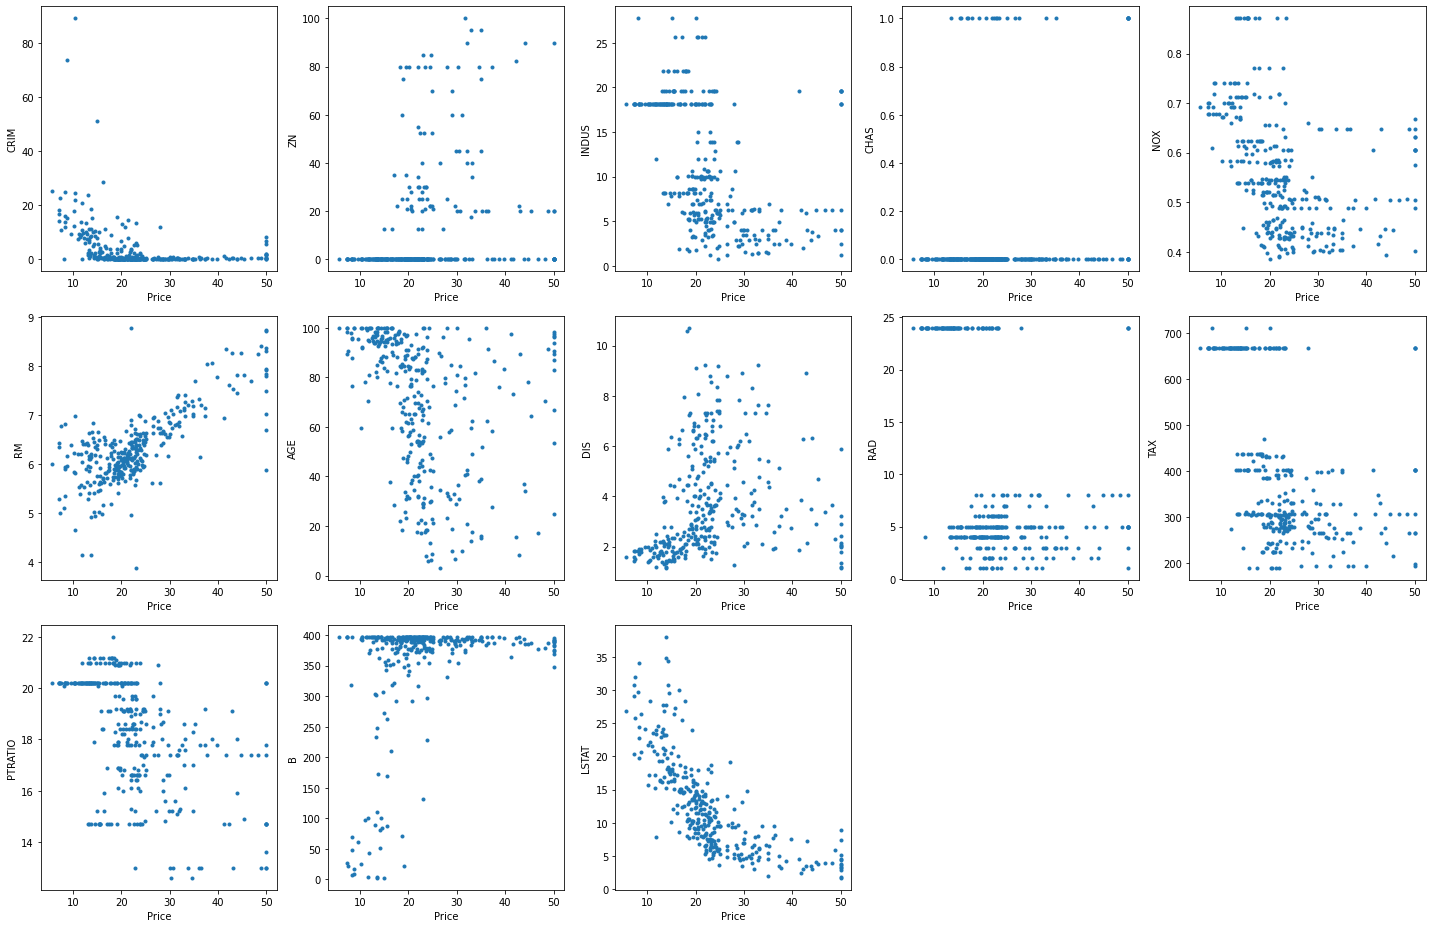

In [13]:
features = df_trn.drop(['MEDV'], axis=1)
price = df_trn['MEDV']
plot_features_vs_price(features, price)

    TODO 1.2 -  Add written response below
    --------------------------------------
    

    TODO 1.3 -  Add written response below
    --------------------------------------
    

# Preprocessing

For this dataset there isn't much to preprocessing to do besides splitting our data into features `X` and labels `y` and performing standardization. In future mini-projects all preprocessing will be left up to you. Since the preprocessing is limited here and this is your first mini-project we'll provide it for you!


## Splitting features and labels

To split your data into features and labels we have defined a function called `feature_label_split()`. This function is located in the `itcs4156/util/data.py` script.

In [14]:
from itcs4156.util.data import feature_label_split

# comment out the below line to hide source code
print(inspect.getsource(feature_label_split))

def feature_label_split(df: pd.DataFrame, 
                        feature_names: List[str], 
                        label_name: str, 
                        return_df: bool = False) -> Union[np.ndarray, pd.DataFrame]:
    """ Splits DataFrame into features and labels
    
        Args:
            df: DataFrame which contains the features and label
            
            feature_name: Name of the columns to be used as features. Only the names given
                will be returned.
            
            label_feature: Name of the column which will be used as the label.
            
            return_df: If True then X and y will be returned as a DataFrame

    """

    if isinstance(feature_names, (list, pd.Index, np.ndarray, tuple)):
        n = len(feature_names)
    else:
        n = 1

    X = df[feature_names]
    y = df[label_name]
    
    if return_df:
        return X, y
    
    return X.values.reshape((-1,n)), y.values.reshape((-1,1))



Below we further define a function to split both our train and validation data.

In [15]:
def split_data(df_trn: pd. DataFrame, 
               df_vld: pd.DataFrame, 
               feature_names: List[str], 
               label_name: str, 
               return_df: bool = False):
    """
        Args:
            df_trn: Your training DataFrame
            
            df_vld: Your validation DataFrame
            
            feature_names: List of features names you want to include 
                in your training and validation data.
            
            label_name: The name of the target/label.
            
            return_df: If True a DataFrame will be returned.
    """
    
    X_trn, y_trn = feature_label_split(df_trn, 
                                       feature_names=feature_names, 
                                       label_name=label_name, 
                                       return_df=return_df)
    X_vld, y_vld = feature_label_split(df_vld, 
                                       feature_names=feature_names, 
                                       label_name=label_name, 
                                       return_df=return_df)
    
    return X_trn, y_trn, X_vld, y_vld

In [16]:
feature_names = df_trn.drop('MEDV', axis=1).columns
label_name = 'MEDV'
df_X_trn, df_y_trn, df_X_vld, df_y_vld = split_data(df_trn, df_vld, feature_names, label_name, return_df=True)


print(f"df_X_trn shape: {df_X_trn.shape}")
print(f"df_X_trn type: {type(df_X_trn)}")
      
print(f"df_y_trn shape: {df_y_trn.shape}")
print(f"df_y_trn type: {type(df_y_trn)}")
      
print(f"df_X_vld shape: {df_X_vld.shape}")
print(f"df_X_vld type: {type(df_X_vld)}")
      
print(f"df_y_vld shape: {df_y_vld.shape}")
print(f"df_y_vld type: {type(df_y_vld)}")

df_X_trn shape: (323, 13)
df_X_trn type: <class 'pandas.core.frame.DataFrame'>
df_y_trn shape: (323,)
df_y_trn type: <class 'pandas.core.series.Series'>
df_X_vld shape: (81, 13)
df_X_vld type: <class 'pandas.core.frame.DataFrame'>
df_y_vld shape: (81,)
df_y_vld type: <class 'pandas.core.series.Series'>


## Standardization

We have implement the `Standardization` class from our labs for you. You can find it in the `itcs4156/util/data` directory. 

In [17]:
from itcs4156.util.data import Standardization

# comment out the below line to hide source code
print(inspect.getsource(Standardization))

class Standardization(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X: Union[np.ndarray, pd.DataFrame]):
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)
        return self
    
    def transform(self, X):
        return (X  - self.mean) / self.std



Below we further define a function to standardize both our train and validation data.

In [18]:
def standardize_data(X_trn: Union[pd.DataFrame, np.ndarray], 
                     X_vld: Union[pd.DataFrame, np.ndarray]):
    """ Standardizes your X training and validation features after
        your data has been split into features and labels.
        
        Args:
            X_trn: You training input features. Make sure the target/label 
                is not included.

            X_vld: You training input features. Make sure the target/label 
                is not included.
    """
    standardize = Standardization()
    X_trn_clean = standardize.fit_transform(X_trn)
    X_vld_clean = standardize.transform(X_vld)
    
    return X_trn_clean, X_vld_clean

Below we demonstrate how to use `standardize_data()`. We also demonstrate how to return DataFrames with the `split_data()` using the `return_df=True` argument.

In [19]:
feature_names = df_trn.drop('MEDV', axis=1).columns
label_name = 'MEDV'
df_X_trn, df_y_trn, df_X_vld, df_y_vld = split_data(df_trn, df_vld, feature_names, label_name, return_df=True)

df_X_trn, df_X_vld = standardize_data(df_X_trn, df_X_vld)


print(f"df_X_trn shape: {df_X_trn.shape}")
print(f"df_X_trn type: {type(df_X_trn)}")
      
print(f"df_y_trn shape: {df_y_trn.shape}")
print(f"df_y_trn type: {type(df_y_trn)}")
      
print(f"df_X_vld shape: {df_X_vld.shape}")
print(f"df_X_vld type: {type(df_X_vld)}")
      
print(f"df_y_vld shape: {df_y_vld.shape}")
print(f"df_y_vld type: {type(df_y_vld)}")

df_X_trn shape: (323, 13)
df_X_trn type: <class 'pandas.core.frame.DataFrame'>
df_y_trn shape: (323,)
df_y_trn type: <class 'pandas.core.series.Series'>
df_X_vld shape: (81, 13)
df_X_vld type: <class 'pandas.core.frame.DataFrame'>
df_y_vld shape: (81,)
df_y_vld type: <class 'pandas.core.series.Series'>


In [20]:
df_X_trn.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.406335,2.694960,-1.018457,-0.283315,-1.243655,-0.588349,-0.761019,1.666643,-0.716674,0.415677,1.248406,0.446969,0.322004
1,-0.317609,-0.491559,-0.423457,-0.283315,-0.161333,0.241637,0.914684,0.319088,-0.598750,-0.571600,1.203706,0.352972,0.041944
2,0.415842,-0.491559,1.007992,-0.283315,0.481296,-0.294367,0.581692,-0.825228,1.759740,1.616254,0.846109,-3.690352,1.510857
3,-0.383846,0.443153,-0.751138,-0.283315,-1.066086,-0.991720,0.273763,1.965410,-0.244976,-0.431431,0.354414,0.190891,-0.000065
4,-0.396142,-0.491559,-0.154701,-0.283315,-0.085232,0.542456,0.456372,-0.516819,-0.362901,0.190187,-0.226681,0.433226,-0.327735


In [21]:
df_X_trn.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,3.230000e+02,3.230000e+02,3.230000e+02,3.230000e+02,3.230000e+02,3.230000e+02,3.230000e+02,3.230000e+02,3.230000e+02,3.230000e+02,3.230000e+02,3.230000e+02,3.230000e+02
mean,-3.162245e-17,-1.099911e-17,-2.199823e-16,8.249335e-18,-2.942263e-16,-4.427143e-16,2.969761e-16,-1.979840e-16,-9.624224e-18,-4.124668e-17,1.770857e-15,-3.299734e-16,2.361372e-16
std,1.001552e+00,1.001552e+00,1.001552e+00,1.001552e+00,1.001552e+00,1.001552e+00,1.001552e+00,1.001552e+00,1.001552e+00,1.001552e+00,1.001552e+00,1.001552e+00,1.001552e+00
min,-4.068657e-01,-4.915592e-01,-1.486984e+00,-2.833153e-01,-1.455046e+00,-3.357249e+00,-2.361531e+00,-1.244874e+00,-9.525234e-01,-1.296822e+00,-2.551059e+00,-3.690352e+00,-1.508186e+00
25%,-3.985286e-01,-4.915592e-01,-8.517422e-01,-2.833153e-01,-9.181126e-01,-5.883491e-01,-7.842929e-01,-8.207827e-01,-5.987499e-01,-7.422406e-01,-6.736768e-01,2.247760e-01,-7.947343e-01
50%,-3.764501e-01,-4.915592e-01,-3.630949e-01,-2.833153e-01,-1.613326e-01,-1.494272e-01,3.310524e-01,-3.124043e-01,-4.808253e-01,-4.375256e-01,1.309158e-01,3.879063e-01,-2.283136e-01
75%,-9.424274e-02,1.457446e-01,1.007992e+00,-2.833153e-01,6.250421e-01,4.269141e-01,8.985716e-01,7.373713e-01,-1.270518e-01,3.181678e-01,8.461092e-01,4.402549e-01,5.453511e-01
max,9.987997e+00,3.757132e+00,2.393451e+00,3.529636e+00,2.654396e+00,3.366050e+00,1.115196e+00,3.261414e+00,1.759740e+00,1.890498e+00,1.650702e+00,4.469689e-01,3.566495e+00


## Putting it all together

Lastly, we define a function `get_cleaned_data()` which will apply all our data cleaning and transformation functions.

In [22]:
def get_cleaned_data(df_trn: pd. DataFrame, 
                    df_vld: pd.DataFrame, 
                    feature_names: List[str], 
                    label_name: str, 
                    return_df: bool = False):
    """ Split and clean your data
    
        Args:
            df_trn: Your training DataFrame
            
            df_vld: Your validation DataFrame
            
            feature_names: List of features names you want to include 
                in your training and validation data.
            
            label_name: The name of the target/label.
            
            return_df: If True a DataFrame will be returned
    """
    
    X_trn, y_trn, X_vld, y_vld = split_data(df_trn, df_vld, feature_names, label_name)
    X_trn, X_vld = standardize_data(X_trn, X_vld)
    
    print(f"X_trn shape: {X_trn.shape}")
    print(f"X_trn type: {type(X_trn)}")

    print(f"y_trn shape: {y_trn.shape}")
    print(f"y_trn type: {type(y_trn)}")

    print(f"X_vld shape: {X_vld.shape}")
    print(f"X_vld type: {type(X_vld)}")

    print(f"y_vld shape: {y_vld.shape}")
    print(f"y_vld type: {type(y_vld)}")

    return X_trn, y_trn, X_vld, y_vld

In [23]:
feature_names = df_trn.drop('MEDV', axis=1).columns
label_name = 'MEDV'
X_trn, y_trn, X_vld, y_vld = get_cleaned_data(df_trn, df_vld, feature_names, label_name)

X_trn shape: (323, 13)
X_trn type: <class 'numpy.ndarray'>
y_trn shape: (323, 1)
y_trn type: <class 'numpy.ndarray'>
X_vld shape: (81, 13)
X_vld type: <class 'numpy.ndarray'>
y_vld shape: (81, 1)
y_vld type: <class 'numpy.ndarray'>


# Performance metrics and plotting

In [24]:
from itcs4156.util.metrics import error, sse, mse, rmse

def performance_measures(y_hat: np.ndarray, y: np.ndarray) -> Tuple[np.ndarray]:
    """ Compute error, SSE, MSE, and RMSE"""
    err = error(y_hat, y)
    sse_ = sse(y_hat, y)
    mse_ = mse(y_hat, y)
    rmse_ = rmse(y_hat, y)
    return err, sse_, mse_, rmse_

In [25]:
def analyze(y_hat: np.ndarray, 
            y: np.ndarray, 
            title: str, 
            dataset: str,
            ylabel: str = None) -> Tuple[np.ndarray, float, float, float]:
    """ Plot your results using your predictions and labels"""
    err, sse, mse_, rmse_ = performance_measures(y_hat, y)
    # plotting
    fig, axs = plt.subplots(1, 2, figsize=(15,7))
    fig.suptitle(title, fontsize=15)
    axs[0].plot(y, 'ob', label = "Targets")
    axs[0].plot(y_hat, 'xr', label = "Predictions")
    axs[0].set_xlabel("Data sample index")
    axs[0].set_ylabel(ylabel)
    axs[0].legend()

    
    y1 = min(y)
    y2 = max(y)
    line = np.arange(y1,y2)
    axs[1].scatter(y, y_hat, label="True vs Predicted", color='b', marker='*')
    axs[1].set_xlabel("Targets")
    axs[1].set_ylabel("Predictions")
    axs[1].set_ylim(y1, y2)
    axs[1].set_xlim(y1, y2)
    axs[1].plot(line, line, label = "Line of Zero Error", color='r')
    axs[1].legend()
    plt.show()
    
    print(f"{dataset} MSE: {mse_}")
    print(f"{dataset} RMSE: {rmse_}")
    print(f"{dataset} SSE: {sse}")
    
    return err, sse, mse_, rmse_


# Linear Regression with One Variable - Ordinary Least Squares
In this 1st task, the goal is to fit a linear model for predicting house price just using the 'RM' feature.

You might have notice in our visualizations in the *Exploration and Visualization* that 'RM'  (i.e., the average number of rooms in the house) showed a linear relationship with our targets 'MEDV'. Checkout the plot produced below by the `plot_price_vs_rooms()` function to confirm this non-linear trend!

## Additional Plots

Below are two additional plots for plotting the 'MEDV' vs 'RM' and plotting the line of best fit!

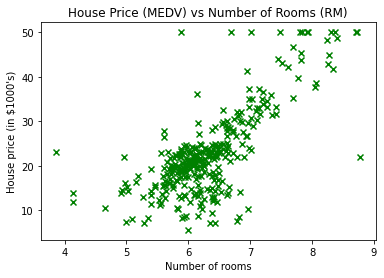

In [26]:
def plot_price_vs_rooms(X,y):
    fig = plt.figure()
    plt.scatter(X, y, marker='x', color='g')
    plt.xlabel("Number of rooms")
    plt.ylabel("House price (in $1000's)")
    plt.title("House Price (MEDV) vs Number of Rooms (RM)")

plot_price_vs_rooms(df_trn['RM'], df_trn['MEDV'])

In [27]:
def plot_best_fit_line(X, y, preds):
    plot_price_vs_rooms(X, y)
    plt.plot(X, preds, color='r', label='Line of best fit')
    plt.legend()
    plt.show()

## Loading data

Let's load only the 'RM' feature and our labels 'MEDV' while applying our data cleaning using the `get_cleaned_data()` function

In [28]:
feature_names = 'RM'
label_name = 'MEDV'
X_trn, y_trn, X_vld, y_vld = get_cleaned_data(df_trn, df_vld, feature_names, label_name)

X_trn shape: (323, 1)
X_trn type: <class 'numpy.ndarray'>
y_trn shape: (323, 1)
y_trn type: <class 'numpy.ndarray'>
X_vld shape: (81, 1)
X_vld type: <class 'numpy.ndarray'>
y_vld shape: (81, 1)
y_vld type: <class 'numpy.ndarray'>


## Training

#### Autolab TODO 1
Fill in the code for the `train()` and `predict()` methods for `OrdinaryLeastSquares` class in the `itcs4156/assignments/regression/OrdinaryLeastSquares.py` file. 

1. Complete the `train()` method which should run the OLS equation and store the best fit weights into `self.w`. Be sure to add ones to the input data `X` using your own code or using the `self.add_ones()` method that is inherited from `LinearModel`.
    1. Hint: See the `itcs4156/models/LinearModel.py` script to see what the `self.add_ones` method does

1. Complete the `predict()` method which should make a prediction and return the output using your learned weights `self.w`. Be sure to add ones to the input data `X` using your own code or using the `self.add_ones()` method that is inherited from `LinearModel`.

In order to test your code try running the below cell to fit your training data!

In [ ]:
from itcs4156.assignments.regression.OrdinaryLeastSquares import OrdinaryLeastSquares

In [ ]:
ols = OrdinaryLeastSquares()

ols.train(X_trn,y_trn)

preds_trn = ols.predict(X_trn)

trn_errs, trn_sse, trn_mse, trn_rmse = analyze(preds_trn, 
                                               y_trn,
                                               title="Training Predictions",
                                               dataset="Training",
                                               ylabel="MEDV - House price (in $1000's)")

Don't forget you can view your learned weights. Take a second to observe the weights and recall what the first weight corresponds to (y-intercept) and what the second weight corresponds to (slope).

In [ ]:
ols.w

In [ ]:
plot_best_fit_line(df_trn['RM'], y_trn, preds_trn)

## Evaluating 

#### TODO 2 
Now, make predictions for the validation set. Visualize your results using at least 3 plots that visualize your predictions and targets.

**To receive <u>full points</u> you must have the following:**
1. Make predictions using your `X_vld` data. Store the output into `preds_vld` if you so choose.
2. Create at least **3** plots visualizing your validation predictions and targets
    1. Feel free to use the `analyze()` and `plot_best_fit_line()` functions which will provide you with three plots
3. You must report the MSE and RMSE for your validation data (by report we mean you need to print them out somewhere below)
    1. Feel free to use the `analyze()` function with provided which reports MSE and RMSE
4. (2-3 sentences) Describe on average how much your predictions are off by (i.e., error). Recall we can use the RMSE to get our error in the original units of the target to make this observation. Our target is 'MEDV' which is average price given in 1000s of dollars. In your own opinion, if you were using this model to price a home you were looking to sell, do you think this error is an acceptable amount to be off by on average?

In [ ]:
# TODO add analysis below (create more code cells if needed)
preds_vld = ols.predict(X_vld)

_, vld_sse, vld_mse, vld_rmse = analyze(preds_vld, y_vld,
         title="Validation Predictions",
         dataset="Validation")

In [ ]:
plot_best_fit_line(df_vld['RM'], y_vld, preds_vld)

    TODO 2 -  Add written response below
    --------------------------------------

# Linear Regression with Multiple Variables - Least Mean Squares

In this 2nd task, you will be using **more than one feature** to predict the house prices. You could use 2, 4 or all the 13 features present in the dataset. 

You will have to analyze for yourself which features will work the best if you want to make it to the top of Autolab leaderboards! You can do so anywhere in the below section.

## Loading data

By default we load all the the features for you. It is up to you to select the features you think are best on your own by changing the value of `feature_names`. Be sure that you DO NOT include the `MEDV` feature in your list of feature names. You might perform really well locally but you will fail the Autolab tests!

In [ ]:
feature_names = df_trn.drop('MEDV', axis=1).columns
label_name = 'MEDV'
X_trn, y_trn, X_vld, y_vld = get_cleaned_data(df_trn, df_vld, feature_names, label_name)

## Training

#### Autolab TODO 2 

Fill in the code for the `train()` and `predict()` methods for `LeastMeanSquares` class in the `itcs4156/assignments/regession/LeastMeanSquares.py` file. Read the documentation within the file to learn more about the class.

1. Complete the `train()` method which learns some weights `self.w` using gradient descent algorithm. You can use either mini-batch or online gradient descent.  
    1. Be sure to add ones to the input data `X` using your own code or using the `self.add_ones()` method that is inherited from `LinearModel`.
    2. Be sure to initialize your weights randomly before starting!
2. Complete the `predict()` method to make a prediction using the learned weights `self.w`.  Be sure to add ones to the input data `X` using your own code or using the `self.add_ones()` method that is inherited from `LinearModel`.

Once done, complete the below TODO to test your code.

In [ ]:
from itcs4156.assignments.regression.LeastMeanSquares import LeastMeanSquares 

To test your code implementation, run the below code cell to train your data. In order to experiment with your least mean squares class, try setting/adjusting the `alpha` or learning rate hyperparamter.

In [ ]:
alpha = 0.1
lms = LeastMeanSquares(alpha)

lms.train(X_trn,y_trn)

preds_trn = lms.predict(X_trn)

trn_errs, trn_sse, trn_mse, trn_rmse = analyze(preds_trn, 
                                               y_trn,
                                               title="Training Predictions",
                                               dataset="Training",
                                               ylabel="MEDV - House price (in $1000's)")

## Evaluating

#### TODO 3 
Now, make predictions for the validation set. Visualize your results using at least 2 plots that visualize your predictions and targets.

**To receive <u>full points</u> you must have the following:**
1. Make predictions using your `X_vld` data. Store the output into `preds_vld` if you so choose.
2. At least **2** plots visualizing your validation predictions and targets
    1. Feel free to use the `analyze()` function which provides two plots
3. You must report the MSE and RMSE for your validation data (by report we mean you need to print them out anywhere below)
    1. Feel free to use the `analyze()` function which also reports MSE and RMSE
4. (2-3 sentences) Describe on average how much your predictions are off by (i.e., error). Recall we can use the RMSE to get our error in the original units of the target to make this observation. Our target is 'MEDV' which is average price given in 1000s of dollars. In your own opinion, if you were using this model to price a home you were looking to sell, do you think this error is an acceptable amount to be off by on average?

In [ ]:
# TODO add analysis below (create more code cells if needed)
preds_vlds = lms.predict(X_vld)

_, vld_sse, vld_mse, vld_rmse = analyze(preds_vld, y_vld,
         title="Validation Predictions",
         dataset="Validation")

    TODO 3 -  Add written response below
    --------------------------------------


# Polynomial Regression with One Variable  - Ordinary Least Squares

In this 3rd task, the goal is to fit a polynomial model for predicting house price just using the 'LSTAT' feature.

You might have notice in our visualizations in the *Exploration and Visualization* that 'LSTAT' (i.e., percent of lower status people out of the population) showed a non-linear relationship (with our targets 'MEDV'. Checkout the plot produced below by the `plot_price_vs_LSTAT()` function to confirm this non-linear trend!

## Additional plots

In [ ]:
def plot_price_vs_LSTAT(X,Y):
    fig = plt.figure()
    plt.scatter(X, Y, marker='.', color='orange')
    plt.xlabel("LSTAT (% Lower Status of Population)")
    plt.ylabel("House price (in $1000's)")
    plt.title("House Price (MEDV) vs % Lower Status (LSTAT)")

plot_price_vs_LSTAT(df_trn['LSTAT'], df_trn['MEDV'])

In [ ]:
def plot_best_poly_fit_line(pr_ols, X, y):
    plot_price_vs_LSTAT(X, y)

    # plot the best line of fit by making predictions for all possible LSTAT values
    line_X = np.linspace(np.min(X_trn), np.max(X_trn), len(X_trn)).reshape(-1,1)
    line_X_preds = pr_ols.predict(line_X)
    plt.plot(line_X, line_X_preds, color='r', label='Line of best fit')
    
    plt.legend()
    plt.show()

## Loading data

Let's load only the 'LSTAT' feature and our labels 'MEDV' while applying our data cleaning using the `get_cleaned_data()` function

In [ ]:
feature_names = 'LSTAT'
label_name = 'MEDV'
X_trn, y_trn, X_vld, y_vld = get_cleaned_data(df_trn, df_vld, feature_names, label_name)

## Training

#### Autolab TODO 3 

Fill in the code for the `add_polynomial_features()`, `train()` and `predict()` methods in the `PolynomialRegression` class located in the `itcs4156/assignments/regession/PolynomialRegression.py` file. Read the documentation within the file to learn more about the class.

1. Complete the `add_polynomial_features()` method which computes the polynomial features for the passed data. It should return your data with the new polynomial features. 
    1. Hint:  Feel free to use `sklearn.preprocessing.PolynomialFeatures` but remember it includes the bias so make sure to disable said feature! **It will also include combination of features not just the polynomial features which is fine as well!**
2. Complete the `train()` method which learns some weights `self.w` using the OLS equation and your polynomial data `X_poly`.  
    1. Hint: Since we inherit from `OrdinaryLeastSquares` you can simply just call `super().train(X, y)` instead of copying the code from `OrdinaryLeastSquares` after you run `self.add_polynomial_features(X)`. Further, there is no need to add bias if you add the bias in the `super().train(X, y)` method. 
3. Complete the `predict()` method to make a prediction using the learned weights `self.w` and the polynomial features `X_poly`. 
    1. Hint: Since we inherit from `OrdinaryLeastSquares` you can simply just call `super().train(X, y)` instead of copying the code from `OrdinaryLeastSquares` after you run `self.add_polynomial_features(X)`. Further, there is no need to add bias if you add the bias in the `super().train(X, y)` method. 

In [ ]:
from itcs4156.assignments.regression.PolynomialRegression import PolynomialRegression

To test your code implementation, run the below code cell to train your data. In order to experiment with your polynomial regression class, try setting/adjusting the `degree` hyperparamter.

In [ ]:
degree = 3
pr_ols = PolynomialRegression(degree)

pr_ols.train(X_trn, y_trn)

preds_trn = pr_ols.predict(X_trn)

trn_errs, trn_sse, trn_mse, trn_rmse = analyze(preds_trn, 
                                               y_trn,
                                               title="Training Predictions",
                                               dataset="Training",
                                               ylabel="MEDV - House price (in $1000's)")

In [ ]:
plot_best_poly_fit_line(pr_ols, X_trn, y_trn)

## Evaluating

#### TODO 4 
Now, make predictions for the validation set. Visualize your results using at least 3 plots that visualize your predictions and targets.

**To receive <u>full points</u> you must have the following:**
1. Make predictions using your `X_vld` data. Store the output into `preds_vld` if you so choose.
2. At least **3** plots visualizing your validation predictions and targets
    1. Feel free to use the `analyze()` and `plot_best_poly_fit_line()` functions which will provide you with three plots
3. You must report the MSE and RMSE for your validation data (by report we mean you need to print them out anywhere below)
    1. Feel free to use the `analyze()` function with provided which reports MSE and RMSE
4. (2-3 sentences) Describe on average how much your predictions are off by (i.e., error). Recall we can use the RMSE to get our error in the original units of the target to make this observation. Our target is 'MEDV' which is average price given in 1000s of dollars. In your own opinion, if you were using this model to price a home you were looking to sell, do you think this error is an acceptable amount to be off by on average?

In [ ]:
preds_vlds = pr_ols.predict(X_vld)

_, vld_sse, vld_mse, vld_rmse = analyze(preds_vld, y_vld,
         title="Validation Predictions",
         dataset="Validation")

In [ ]:
plot_best_poly_fit_line(pr_ols, X_vld, y_vld)

    TODO 4 -  Add written response below
    --------------------------------------
    

# Polynomial Regression with Multiple Variables - Regularized Ordinary Least Squares

In the 4th task and final task, you will fit a regularized polynomial model using **multiple features** to predict the house prices just like you did in task 2. Additionally, you will make use of L2  regularization.

You will have to analyze for yourself which features will work the best if you want to make it to the top of Autolab leaderboards! You can do so anywhere in the below section.

## Data Loading

By default we load all the the features for you. It is up to you to select the features you think are best on your own by changing the value of `feature_names`. Be sure that you DO NOT include the `MEDV` feature in your list of feature names. You might perform really well locally but you will fail the Autolab tests!

In [ ]:
feature_names = df_trn.drop('MEDV', axis=1).columns
label_name = 'MEDV'
X_trn, y_trn, X_vld, y_vld = get_cleaned_data(df_trn, df_vld, feature_names, label_name)

## Training

#### Autolab TODO 4 
Fill in the code for the `train()` method in the `PolynomialRegressionRegularized` class located in the `itcs4156/assignments/regession/PolynomialRegressionRegularized.py` file. Read the documentation within the file to learn more about the class. Take note that this class inherits from `PolynomialRegression`, so we have access to all the methods we defined in `PolynomialRegression` including `add_polynomial_features()` and `predict()`.

1. Complete `train()` method which learns some weights `self.w` using the **L2 regularized** OLS equation (ridge regression) and your polynomial data `X_poly`. 
    1. Be sure to add the bias **AFTER** computing the polynomial features. Typically we don't want to include the bias when computing polynomial features.
    2. You'll have to additionally create an identity matrix where the first element (the bias) is equal to 0!


In [ ]:
from itcs4156.assignments.regression.PolynomialRegressionRegularized import PolynomialRegressionRegularized

To test your code implementation, run the below code cell to train your data. In order to experiment which ridge regression try setting/adjusting the `degree` and `lamb` hyperparamters.

In [ ]:
degree = 2
lamb = 1
pr_rols = PolynomialRegressionRegularized(degree, lamb)

pr_rols.train(X_trn, y_trn)

preds_trn = pr_rols.predict(X_trn)

trn_errs, trn_sse, trn_mse, trn_rmse = analyze(preds_trn, 
                                               y_trn,
                                               title="Training Predictions",
                                               dataset="Training",
                                               ylabel="MEDV - House price (in $1000's)")

## Evaluating 

#### TODO 5
Now, make predictions for the validation set. Visualize your results using at least 2 plots that visualize your predictions and targets.

**To receive <u>full points</u> you must have the following:**
1. Make predictions using your `X_vld` data. Store the output into `X_vlds` if you so choose.
2. At least **2** plots visualizing your validation predictions and targets
    1. Feel free to use the `analyze()` function which provides two plots
3. You must report the MSE and RMSE for your validation data (by report we mean you need to print them out anywhere below)
    1. Feel free to use the `analyze()` function which also reports MSE and RMSE
4. ((2-3 sentences) Describe on average how much your predictions are off by (i.e., error). Recall we can use the RMSE to get our error in the original units of the target to make this observation. Our target is 'MEDV' which is average price given in 1000s of dollars. In your own opinion, if you were using this model to price a home you were looking to sell, do you think this error is an acceptable amount to be off by on average?

In [ ]:
# TODO add analysis below (create more code cells if needed)

    TODO 5 -  Add written response below
    --------------------------------------

# Evaluation Script

Once you have finished all the above four **TODOs** and you are satisfied with the  results you are getting, it is time evaluate all your code together and make it ready for submission.

####  Autolab TODO 5

Open the `train.py` file in the `itcs4156/assignments/regression` directory and set the appropriate parameters (features, alpha, degree, lamb, ect) for each algorithm in the given classes. Further, in the `get_features_for_lsm()` function return the features you want to use for training your LMS algorithm with multiple features (task 2). Likewise, in the 
`get_features_for_poly_reg()` function return the features you want to use for training your regularized polynomial regression using OLS with multiple features (task 4).

These parameters will be used in by `evaulate.py` script which will locally test your code. Further, these parameters will be used by Autolab to evaluate your algorithm performance when using an unseen test set. **MAKE SURE THEY ARE SET BEFORE RUNNING `run_eval()` LOCALLY AND BEFORE SUBMITTING TO AUTOLAB!** 

## Final Testing

Next, we will evaluate all your models on the validation split. The test case will pass if your validation mse is less than the alloted threshold (see rubric at the start of the notebook). **This only indicates that your model is likely to satisfy the minimum requirement for receiving full points.** Recall, full points will only be given for each test you pass when using the **TEST** set on Autolab. 

### Average Score
It also gives you an estimated average score. Your **Average Test** score will determine your leaderboard position when computed by Autolab. You can use the **Average Validation** score to estimate your test score. 

    MSE averages for 4 successful tests
        Average Training MSE: 28.861541229615845
        Average Validation MSE: 28.29102095027283


### Errors

If a given test fails when running `run_eval()` due to a thrown error the error will be printed for the corresponding algorithm/class. You can view any errors both locally, when using the below test, and on Autolab by clicking on the submission and viewing the log. 

### Autolab Time Limit
For this assignment when you submit to Autolab you will only have **180 seconds for <u>ALL</u> your algorithms to be trained and tested**. If you exceed this time then Autolab will kill your job. You can see the elapsed time in the bottom of the `run_eval()` output locally and in Autolab.

In [ ]:
from itcs4156.assignments.regression.evaluate import run_eval
run_eval();